# 3 ETF Portfolio Analyis
---

Covering VTI + VXUS + SMH

In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


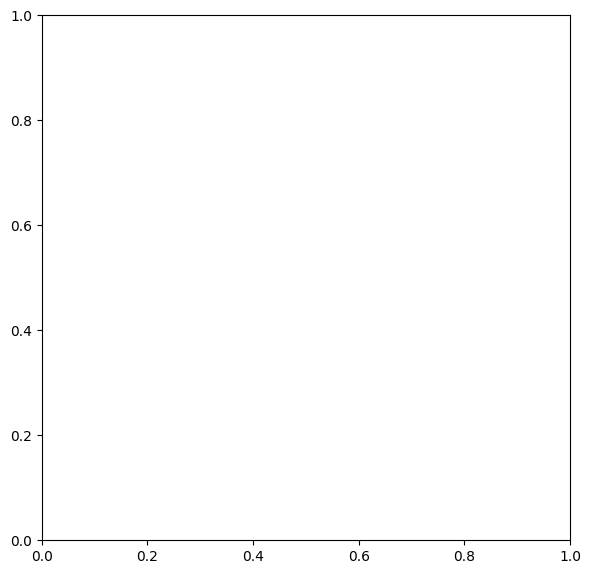

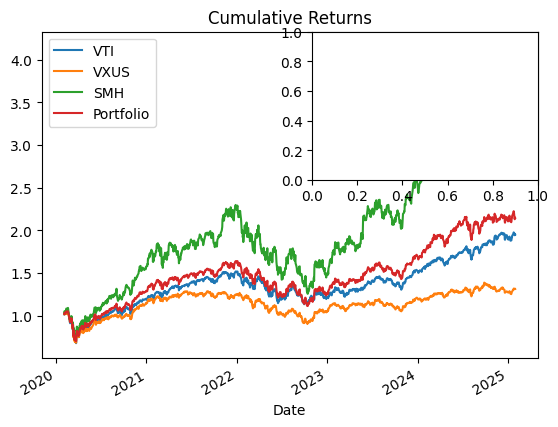

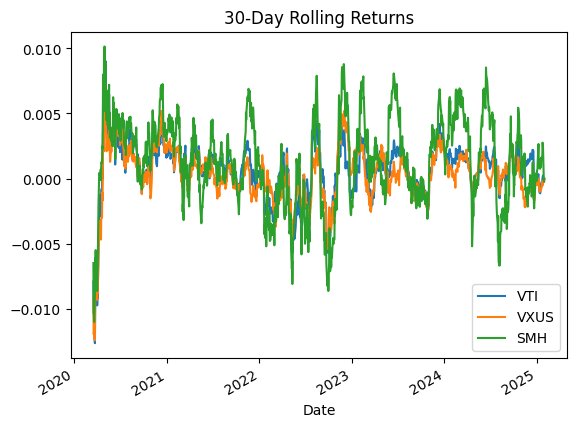

In [ ]:
def analyze_portfolio(tickers, weights='none'):
    # If no weights provided, make them equal
    if weights is None:
        weights = [1/len(tickers)] * len(tickers)
        # Example: for 3 ETFs, this creates [0.33, 0.33, 0.33]
        
    # Set date range for past 5 years
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5*365)
    
    # Create empty DataFrame and fill with adjusted closing prices
    data = pd.DataFrame()
    for ticker in tickers:
        etf = yf.download(ticker, start=start_date, end=end_date)
        data[ticker] = etf['Close']

    # Calculate returns
    # returns = data.pct_change()
    # portfolio_returns = returns.dot(weights)

     # 1. Cumulative Returns
    cumulative_returns = (1 + returns).cumprod()
    portfolio_cumulative = (1 + portfolio_returns).cumprod()
    
    # 2. Volatility (annualized)
    volatility = returns.std() * np.sqrt(252)
    portfolio_volatility = portfolio_returns.std() * np.sqrt(252)
    
    # 3. Sharpe Ratio (assuming risk-free rate of 2%)
    rf = 0.02
    excess_returns = portfolio_returns - rf/252
    sharpe_ratio = np.sqrt(252) * excess_returns.mean() / portfolio_returns.std()
    
    # 4. Maximum Drawdown
    rolling_max = portfolio_cumulative.expanding(min_periods=1).max()
    drawdowns = portfolio_cumulative/rolling_max - 1
    max_drawdown = drawdowns.min()
    
    # 5. Rolling 30-day returns
    rolling_returns = returns.rolling(window=30).mean()
    
    # Plotting
    plt.figure(figsize=(15, 15))
    
    # Plot 1: Cumulative Returns
    plt.subplot(2, 2, 1)
    cumulative_returns.plot()
    portfolio_cumulative.plot(label='Portfolio')
    plt.title('Cumulative Returns')
    plt.legend()
    
    # Plot 2: Rolling 30-day Returns
    plt.subplot(2, 2, 2)
    rolling_returns.plot()
    plt.title('30-Day Rolling Returns')
    plt.legend()
    
    # Plot 3: Drawdown
    # plt.subplot(2, 4, 4)
    # drawdowns.plot()
    # plt.title('Portfolio Drawdown')
    
    # Print metrics
    metrics = pd.DataFrame({
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    })
    
    return metrics, plt.gcf()

tickers = ['VTI', 'VXUS', 'SMH']
weights = [0.4, 0.3, 0.3] 
metrics, fig = analyze_portfolio(tickers, weights)